In [1]:
import pickle
import pandas as pd
import numpy as np
import re
import requests
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 1, style = 'darkgrid', rc={'figure.figsize':(7,5)})

In [2]:
researcher_df = pd.read_pickle("Files/Dataframes/researchers_all.pkl").reset_index(drop = True)

In [3]:
#add space after dot
researcher_df['Name'] = researcher_df.Name.str.replace(r'(?<=[.])(?=[^\s])', r' ', regex = True)

In [4]:
#adding column with name as lowercase
researcher_df['LowerCaseName'] = researcher_df.Name.str.lower()

## Plot

In [5]:
invited = researcher_df[researcher_df.SessionType == 'invited']
attendees = researcher_df[researcher_df.SessionType == 'attendee']

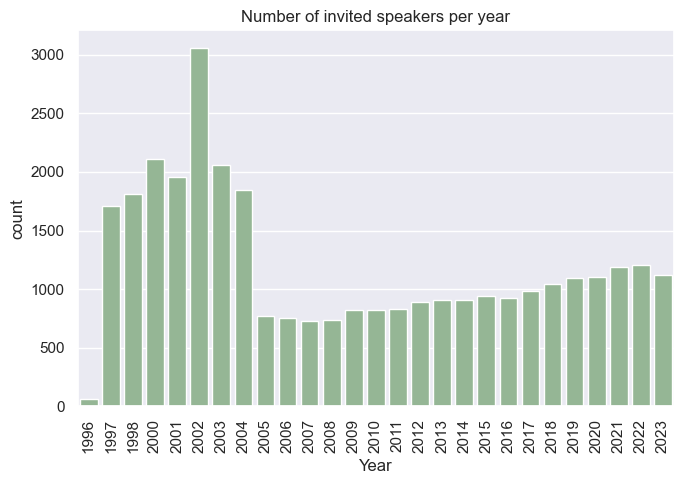

In [6]:
sns.countplot(x = 'Year', data = invited , color = 'darkseagreen')
plt.xticks(rotation=90)
plt.title('Number of invited speakers per year')
plt.tight_layout()
plt.savefig("Figures/invitedSpeaker_allData.png", bbox_inches='tight')
plt.show()

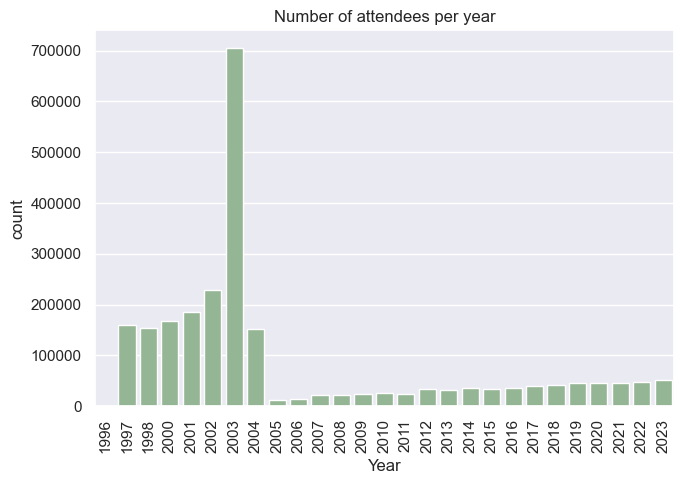

In [7]:
sns.countplot(x = 'Year', data = attendees , color = 'darkseagreen')
plt.xticks(rotation=90)
plt.title('Number of attendees per year')
plt.tight_layout()
plt.savefig("Figures/attendees_allData.png", bbox_inches='tight')
plt.show()

## Filtering data

We are now removing data before 2005.

In [8]:
researchers_2005 = researcher_df[researcher_df.Year >= 2005]

In [9]:
#create and save dict with ID and name of researcher
ID = np.arange(0,len(researchers_2005.LowerCaseName.unique())) #id of 0 to length of unique names
researcher_db = dict(zip(ID, researchers_2005.LowerCaseName.unique())) #dict with researcher name(lowercase) and ID

#save researcherDB as pickle
with open('Files/Dictionary/researcherDB.pkl', 'wb') as f:
    pickle.dump(researcher_db, f)

In [10]:
researcherDB = pd.DataFrame.from_dict(researcher_db,orient='index').reset_index().rename(columns={'index': 'ID', 0: 'LowerCaseName'})

In [13]:
#merge researcherDB with df_researchers
researchers = researchers_2005.merge(researcherDB, how='inner', on='LowerCaseName')

In [14]:
#save researchers as researchers_allFrom2005
researchers.to_pickle("Files/Dataframes/researchers_allFrom2005.pkl")